Dataset Overview:
Number of rows: 181691
Number of columns: 135
Column names: Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


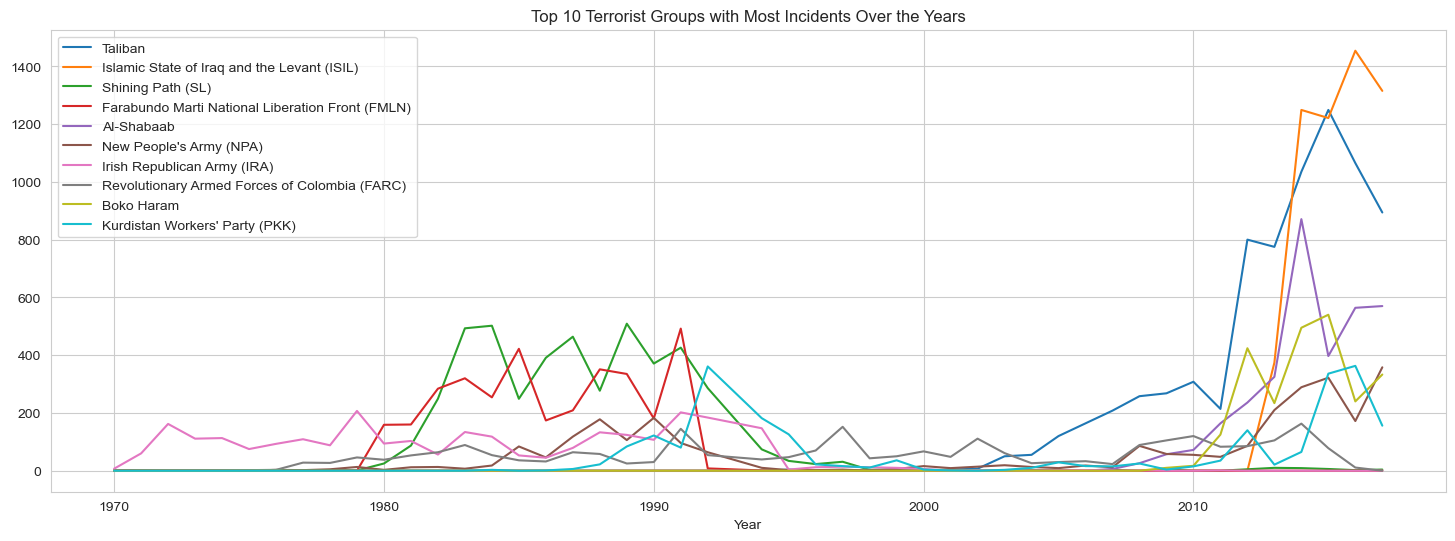

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:\\Users\\srini\\OneDrive\\Desktop\\uni\\DataVisualisation\\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

# Display basic information about the dataset
print("Dataset Overview:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Column names:", df.columns)

# Rename columns for better readability
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

# Select relevant columns
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed',
       'Wounded','Target','extended','Group','Target_type','Weapon_type','Motive']]

# Filter dataframe to include top 10 groups with most incidents
top10_groups=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]

# Reorder top10_groups df based on the frequency of occurrences
top10_groups_ordered = top10_groups['Group'].value_counts().index.tolist()

# Plot the number of incidents for top 10 groups over the years
sns.set_style("whitegrid")
incident_counts = pd.crosstab(top10_groups.Year, top10_groups.Group)
incident_counts = incident_counts[top10_groups_ordered]  # Reorder columns based on top10_groups_ordered
incident_counts.plot(color=sns.color_palette("tab10"))

fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.title('Top 10 Terrorist Groups with Most Incidents Over the Years')

# Customize legend labels with names of top 10 groups
legend_labels = top10_groups_ordered[:10]
plt.legend(legend_labels)
plt.show()